## TSF Task 7: Stock Market Prediction using Numerical and Textual Analysis

Objective: Create a hybrid model for stock price/performance
prediction using numerical analysis of historical stock prices, and
sentimental analysis of news headlines

In [1]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv("india-news-headlines.csv")
df1 = pd.read_csv("^BSESN.csv")

In [3]:
df[:5]

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [4]:
df1[:5]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


## Sentiment Analysis

In [5]:
df = df.drop(["headline_category"], axis=1) #Cleaning Data

In [6]:
df[:5]

,publish_date,headline_text
0,20010102,Status quo will not be disturbed at Ayodhya; s...
1,20010102,Fissures in Hurriyat over Pak visit
2,20010102,America's unwanted heading for India?
3,20010102,For bigwigs; it is destination Goa
4,20010102,Extra buses to clear tourist traffic


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
reg = SentimentIntensityAnalyzer()

In [9]:
reg.polarity_scores(df["headline_text"][0])
print(reg)

In [10]:
df['Compound'] = [reg.polarity_scores(i)['compound'] for i in df['headline_text']]
df['Negative'] = [reg.polarity_scores(i)['neg'] for i in df['headline_text']]
df['Neutral'] = [reg.polarity_scores(i)['neu'] for i in df['headline_text']]
df['Positive'] = [reg.polarity_scores(i)['pos'] for i in df['headline_text']]

In [11]:
df[:5]

,publish_date,headline_text,Compound,Negative,Neutral,Positive
0,20010102,Status quo will not be disturbed at Ayodhya; s...,0.2924,0.000,0.805,0.195
1,20010102,Fissures in Hurriyat over Pak visit,0.0000,0.000,1.000,0.000
2,20010102,America's unwanted heading for India?,-0.2263,0.322,0.678,0.000
3,20010102,For bigwigs; it is destination Goa,0.0000,0.000,1.000,0.000
4,20010102,Extra buses to clear tourist traffic,0.3818,0.000,0.658,0.342


In [12]:
df["publish_date"] = pd.to_datetime(df["publish_date"],format='%Y%m%d')

In [14]:
df[:5]

,publish_date,headline_text,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.2924,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.0000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,-0.2263,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.0000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.3818,0.000,0.658,0.342


## Stock Dataset

In [19]:
import matplotlib.pyplot as plt
import seaborn as sn

In [20]:
df1[:5]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0


In [21]:
df1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,37804.237375,38071.182859,37422.826992,37745.454117,37745.454117,19134.000000
std,4507.985769,4380.974060,4647.212947,4535.304336,4535.304336,16540.261333
min,26499.810547,27462.869141,25638.900391,25981.240234,25981.240234,0.000000
25%,34369.659179,34779.932618,33975.389648,34257.097656,34257.097656,13125.000000
50%,38489.480469,38750.359375,38234.869140,38425.974610,38425.974610,17000.000000
75%,41179.222656,41376.482422,41023.923828,41135.233399,41135.233399,21075.000000
max,46774.320313,46992.570313,46627.601563,46890.339844,46890.339844,188300.000000


In [22]:
df1.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [23]:
df1.fillna(0, inplace=True)

In [24]:
df1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [25]:
#Plotting closing price over the years

Text(0.5, 1.0, 'CLOSING PRICE')

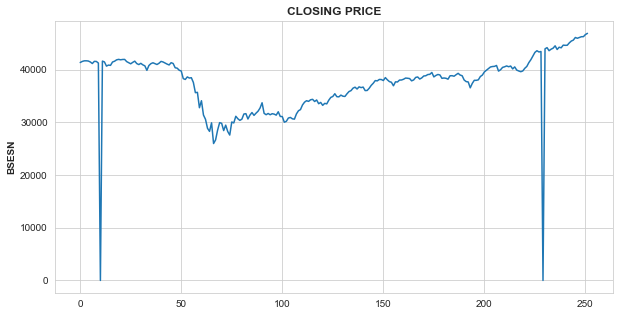

In [26]:
plt.figure(figsize=(10,5))
sn.set_style("whitegrid")
df1['Close'].plot()
plt.ylabel("BSESN", weight="bold")
plt.title("CLOSING PRICE", weight="bold")

Text(0.5, 1.0, 'OPENING v CLOSING PRICE')

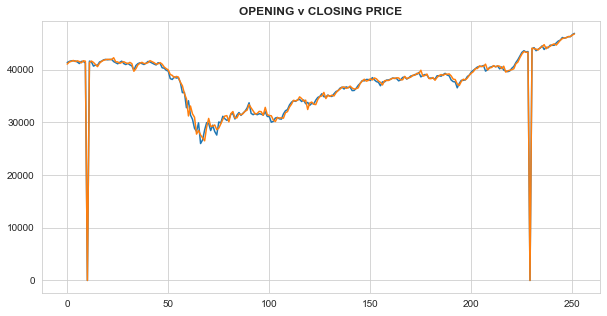

In [27]:
plt.figure(figsize=(10,5))
sn.set_style("whitegrid")
df1['Close'].plot()
df1['Open'].plot()
plt.title("OPENING v CLOSING PRICE", weight="bold")

Text(0.5, 1.0, 'HIGHEST v LOWEST PRICE')

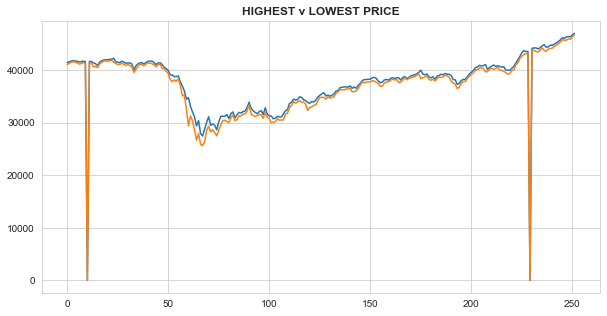

In [28]:
plt.figure(figsize=(10,5))
sn.set_style("whitegrid")
df1['High'].plot()
df1['Low'].plot()
plt.title("HIGHEST v LOWEST PRICE", weight="bold")

## Combining data and predicting

In [29]:
df.rename(columns={'publish_date': 'Date'}, inplace=True)

In [30]:
df

,Date,headline_text,Compound,Negative,Neutral,Positive
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.2924,0.000,0.805,0.195
1,2001-01-02,Fissures in Hurriyat over Pak visit,0.0000,0.000,1.000,0.000
2,2001-01-02,America's unwanted heading for India?,-0.2263,0.322,0.678,0.000
3,2001-01-02,For bigwigs; it is destination Goa,0.0000,0.000,1.000,0.000
4,2001-01-02,Extra buses to clear tourist traffic,0.3818,0.000,0.658,0.342
...,...,...,...,...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...,0.2023,0.000,0.870,0.130
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...,0.2023,0.000,0.870,0.130
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...,0.2023,0.000,0.870,0.130
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...,0.1280,0.000,0.857,0.143


In [31]:
df1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [32]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [33]:
df1.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [34]:
df_final = pd.merge(df1, df, how='inner', on='Date')
df_final

,Date,Open,High,Low,Close,Adj Close,Volume,headline_text,Compound,Negative,Neutral,Positive
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,After Jagannath Temple; Puri beach devpt plan ...,0.0000,0.000,1.000,0.000
1,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,Caffeine high for self-help group from Koraput,0.0000,0.000,1.000,0.000
2,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,Chaos mars FASTag debut at toll plazas,-0.5719,0.381,0.619,0.000
3,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,After breather; onion inches back to Rs 120/kg,0.0000,0.000,1.000,0.000
4,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0,Water board to handle sewer woes in surroundin...,-0.4404,0.244,0.756,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
125733,2020-12-17,46774.320313,46992.570313,46627.601563,46890.339844,46890.339844,0.0,Man beaten; detained on suspicion of taking drugs,-0.7964,0.618,0.382,0.000
125734,2020-12-17,46774.320313,46992.570313,46627.601563,46890.339844,46890.339844,0.0,Man-eater leopard terrifies Baramati,-0.5574,0.545,0.455,0.000
125735,2020-12-17,46774.320313,46992.570313,46627.601563,46890.339844,46890.339844,0.0,Gujarat enforces anti-land grab law,0.0000,0.000,1.000,0.000
125736,2020-12-17,46774.320313,46992.570313,46627.601563,46890.339844,46890.339844,0.0,AP CM Jagan Reddy bats for revised cost of Pol...,0.0000,0.000,1.000,0.000


In [35]:
df_final = df_final.drop(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'headline_text'], axis=1)

In [36]:
df_final[:5]

,Close,Compound,Negative,Neutral,Positive
0,41352.171875,0.0000,0.000,1.000,0.0
1,41352.171875,0.0000,0.000,1.000,0.0
2,41352.171875,-0.5719,0.381,0.619,0.0
3,41352.171875,0.0000,0.000,1.000,0.0
4,41352.171875,-0.4404,0.244,0.756,0.0


In [37]:
df_final.isna().sum()

Close       0
Compound    0
Negative    0
Neutral     0
Positive    0
dtype: int64

In [38]:
df_final.dtypes

Close       float64
Compound    float64
Negative    float64
Neutral     float64
Positive    float64
dtype: object

In [39]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [40]:
df_final1 = pd.DataFrame(mm.fit_transform(df_final)) #Normalization
df_final1.columns = df_final.columns
df_final1.index = df_final.index

In [41]:
df_final1[:5]

,Close,Compound,Negative,Neutral,Positive
0,0.881891,0.501386,0.000,1.000,0.0
1,0.881891,0.501386,0.000,1.000,0.0
2,0.881891,0.202197,0.381,0.619,0.0
3,0.881891,0.501386,0.000,1.000,0.0
4,0.881891,0.270991,0.244,0.756,0.0


In [42]:
X = df_final1.drop(['Close'], axis=1)
y = df_final1['Close']

In [43]:
X.head()

,Compound,Negative,Neutral,Positive
0,0.501386,0.000,1.000,0.0
1,0.501386,0.000,1.000,0.0
2,0.202197,0.381,0.619,0.0
3,0.501386,0.000,1.000,0.0
4,0.270991,0.244,0.756,0.0


In [44]:
y.head()

0    0.881891
1    0.881891
2    0.881891
3    0.881891
4    0.881891
Name: Close, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [47]:
X_train

,Compound,Negative,Neutral,Positive
63612,0.501386,0.000,1.000,0.000000
17874,0.555114,0.153,0.667,0.209546
112825,0.270991,0.209,0.791,0.000000
25528,0.501386,0.000,1.000,0.000000
68632,0.358462,0.185,0.635,0.209546
...,...,...,...,...
45891,0.501386,0.000,1.000,0.000000
117952,0.501386,0.000,1.000,0.000000
42613,0.346534,0.180,0.820,0.000000
43567,0.323516,0.352,0.455,0.224680


In [48]:
X_test

,Compound,Negative,Neutral,Positive
59248,0.217682,0.368,0.632,0.000000
87117,0.162072,0.462,0.538,0.000000
7064,0.094219,0.382,0.618,0.000000
19031,0.501386,0.000,1.000,0.000000
23045,0.346534,0.239,0.761,0.000000
...,...,...,...,...
22742,0.501386,0.000,1.000,0.000000
40732,0.301648,0.302,0.698,0.000000
5737,0.370599,0.356,0.385,0.302678
109240,0.711640,0.000,0.816,0.214203


In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error

In [50]:
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
sm = svm.SVR()

In [51]:
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
rf1 = mean_squared_error(predictions, y_test)

In [52]:
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
dt1 = mean_squared_error(predictions, y_test)

In [53]:
sm.fit(X_train, y_train)
predictions = sm.predict(X_test)
sm1 = mean_squared_error(predictions, y_test)

In [56]:
df = pd.DataFrame(columns=['model','mse'])
df

,model,mse


In [57]:
df = df.append({ 'model' :"Random Forest", 'mse': rf1}, ignore_index=True)
df = df.append({ 'model' :"Decision Tree Regressor", 'mse': dt1}, ignore_index=True)
df = df.append({ 'model' :"SVM", 'mse': sm1}, ignore_index=True)

In [58]:
df = df.sort_values('mse', ascending=True)

In [59]:
df

,model,mse
2,SVM,0.014425
0,Random Forest,0.014651
1,Decision Tree Regressor,0.015468


Text(0, 0.5, 'ALGORITHM')

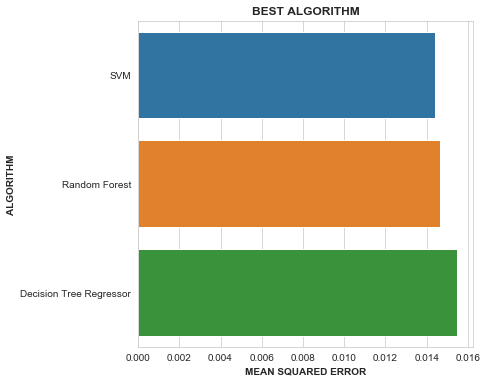

In [60]:
plt.figure(figsize=(6,6))
ax = sn.barplot(x=df['mse'], y=df['model'])
plt.title('BEST ALGORITHM', weight='bold')
plt.xlabel('MEAN SQUARED ERROR', weight='bold')
plt.ylabel('ALGORITHM', weight='bold')

## Conclusion:

SVM algorithm gives the lowest value of mean squared error. The lower the mean sqaured error, the better it is for the model. Hence, SVM Algorithm will be the best for our dataset. 